In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5266,AJ렌터카 법인 카셰어링,MAPS_AND_NAVIGATION,NaN,0,27M,10+,Free,0,Everyone,Maps & Navigation,"July 30, 2018",1.0.0.0,4.3 and up
6462,"Borneo Bible, BM Bible",BOOKS_AND_REFERENCE,4.9,659,5.0M,"10,000+",Free,0,Everyone,Books & Reference,"August 28, 2017",4.4.5,4.0 and up
5644,Block Battles: Heroes at War - Multiplayer PVP,GAME,4.3,6698,46M,"500,000+",Free,0,Everyone 10+,Action,"May 14, 2016",1.0.1,2.3 and up
7797,Chest Tracker for Clash Royale,TOOLS,4.3,77717,14M,"5,000,000+",Free,0,Everyone,Tools,"December 29, 2016",1.2.0,4.1 and up
2225,Frozen Free Fall,FAMILY,4.3,1574204,37M,"50,000,000+",Free,0,Everyone,Puzzle;Action & Adventure,"July 27, 2018",6.7.0,4.2 and up
107,Ulta Beauty,BEAUTY,4.7,42050,Varies with device,"1,000,000+",Free,0,Everyone,Beauty,"June 5, 2018",5.4,5.0 and up
8494,dk,FAMILY,4.8,5,1.5M,10+,Free,0,Everyone,Education,"September 18, 2017",1.0,2.3 and up
5212,ChatBolo - AI Chatbot Online,FAMILY,3.3,1407,1.4M,"100,000+",Free,0,Everyone,Entertainment,"September 25, 2015",2.1,2.2 and up
1472,Free Foreclosure Real Estate Search by USHUD.com,HOUSE_AND_HOME,3.4,287,27M,"100,000+",Free,0,Everyone,House & Home,"May 29, 2018",2.4.2,4.4 and up
3231,Sygic Truck GPS Navigation,TRAVEL_AND_LOCAL,4.2,18294,28M,"1,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",13.8.3,4.0 and up


# Preprocessing

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

In [7]:
df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

## category column

In [8]:
df['category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: category, dtype: object

In [9]:
df['category'].value_counts()

category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [26]:
df = df[df['category'] != 1.9]

In [27]:
df['category'].value_counts()

category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

## rating column

In [10]:
rating_median = df['rating'].median()
df['rating'] = df['rating'].fillna(rating_median)

In [11]:
df['rating'].describe()

count    10841.000000
mean         4.207841
std          0.500893
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max         19.000000
Name: rating, dtype: float64

In [28]:
df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
genres            0
last_updated      0
current_ver       0
android_ver       0
dtype: int64

## reviews column

In [14]:
df["reviews"] = df["reviews"].astype("int64")

In [15]:
df["reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: reviews, Length: 10829, dtype: int64

## size column

In [16]:
df['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
df['size'].value_counts()

size
Varies with device    1694
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 457, dtype: int64

#### remove K and M, convert to megabytes, replace 'Varies with device' with median

In [18]:
# Operates on string values in a pandas Series (like the size column) and is designed for string manipulation using regular expressions or simple string replacements.
df["size"] = df["size"].str.replace(r'(\d+\.?\d*)[kK]', lambda x: str(float(x.group(1)) / 1000), regex=True)

# df["column"].replace is typically used to replace entire values in a Series (e.g., replacing "10K" with 0.01). 
# However, when regex=True is used with df["column"].replace, it behaves more like a substring replacement.
df["size"] = df["size"].replace("M","", regex=True)

In [19]:
# Using df["size"] = df["size"].astype('float64') -> could not convert string to float: 'Varies with device'

# convert 'Varies with device' to nan
df["size"] = pd.to_numeric(df["size"], errors='coerce').astype('float64')

In [20]:
size_median = df['size'].median()
df['size'] = df['size'].fillna(size_median)

In [21]:
df['size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 5.50e+00, 1.70e+01, 3.90e+01, 3.10e+01,
       4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00, 4.60e+00,
       9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 1.30e+01, 9.40e+00,
       1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00, 7.90e+00,
       5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01, 3.60e+00,
       5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.70e+00, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e+01, 2.30e

# EDA

In [22]:
plt.rcParams['figure.figsize'] = (8, 6)

<Axes: xlabel='rating'>

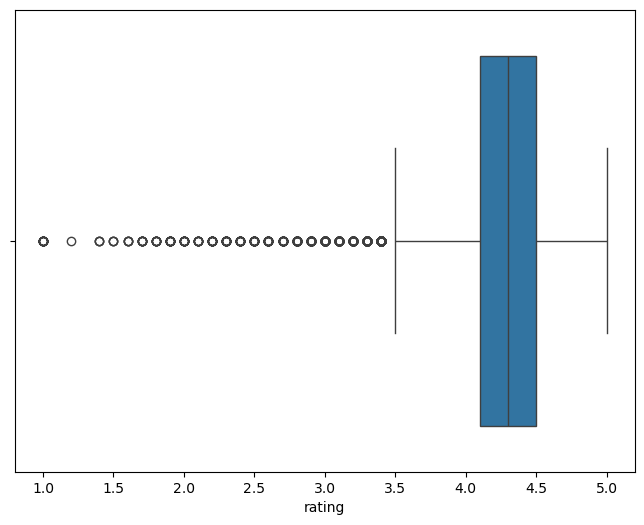

In [23]:
sns.boxplot(x = "rating", data = df)

Text(0.5, 1.0, 'Distribution of Ratings')

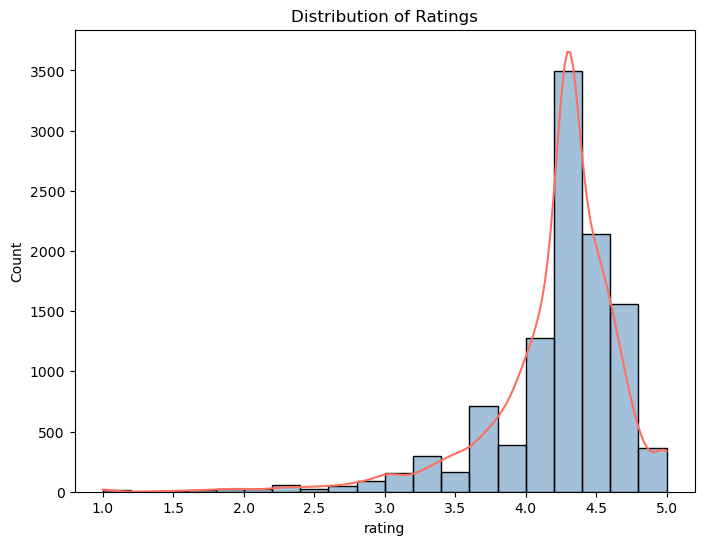

In [24]:
# sns.histplot(data = df['Rating'], bins = 20, kde = True, color="#000080")

ax = sns.histplot(data=df['rating'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of Ratings")

Text(0.5, 1.0, 'Categories with their counts')

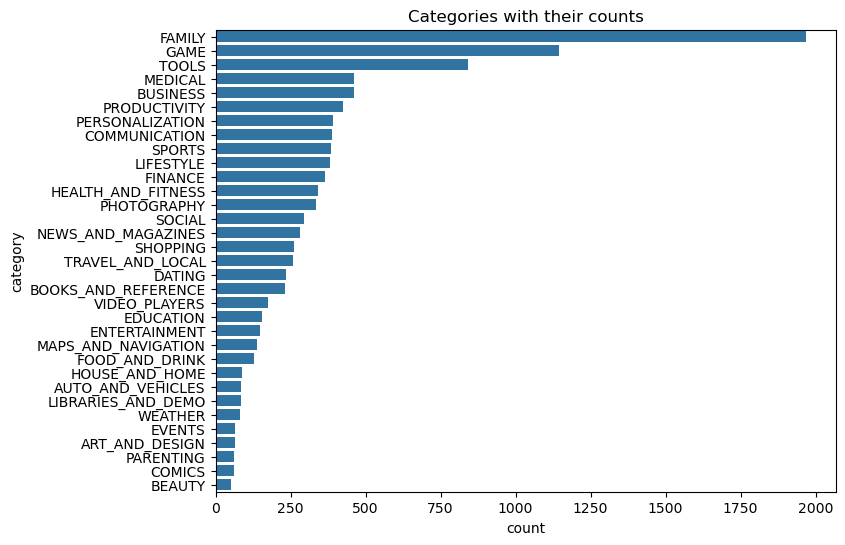

In [25]:
order = df['category'].value_counts().index

sns.countplot(y = "category", data = df, order=order)
plt.title("Categories with their counts")